# Example of read pdf from S3 using CleverDoc

![apicom.pro](https://apicom.pro/static/logo-small-borderless.8f68168a2b0e.png)

### Install CleverDoc

In [ ]:
%pip install -U cleverdoc[inference]

### Start Spark Session with CleverDoc

For get Trial license please contact to email: [license@apicom.pro](license@apicom.pro)

In [6]:
license = "your license"

conf = {
    'spark.hadoop.fs.s3a.access.key': "your AWS access key",
    'spark.hadoop.fs.s3a.secret.key': "your AWS secret key",
    # in case of using custom endpoint
    "spark.hadoop.fs.s3a.endpoint": "endpoint"
}

from cleverdoc import *
spark = start(license, with_aws=True, extra_conf=conf)
spark

Spark version: 3.4.2
CleverDoc version: 1.0.3


### Read PDF from S3

In [2]:
pdf_path = "s3a://datasets/pdfs/reports/Positive-Report.pdf"
df = spark.read.format("pdf") \
    .option("pagePerPartition", "2") \
    .option("reader", "pdfbox") \
    .load(pdf_path) \
# Print total number of pages
df.count()

24/06/04 09:29:13 WARN MetricsConfig: Cannot locate configuration: tried hadoop-metrics2-s3a-file-system.properties,hadoop-metrics2.properties


23

### Show content of the few first pages

24/06/04 09:29:59 WARN CacheManager: Asked to cache already cached data.


License uid: a6e80c86-204a-11ef-976d-0242ac130004
License expiration date: 2025-06-02 01:59:59


Run Pdf to Image                                                    (0 + 1) / 1]
Run Pdf to Image



    Image #0:
    Origin: s3a://datasets/pdfs/reports/Positive-Report.pdf
    Resolution: 300 dpi
    Width: 7969 px
    Height: 10310 px


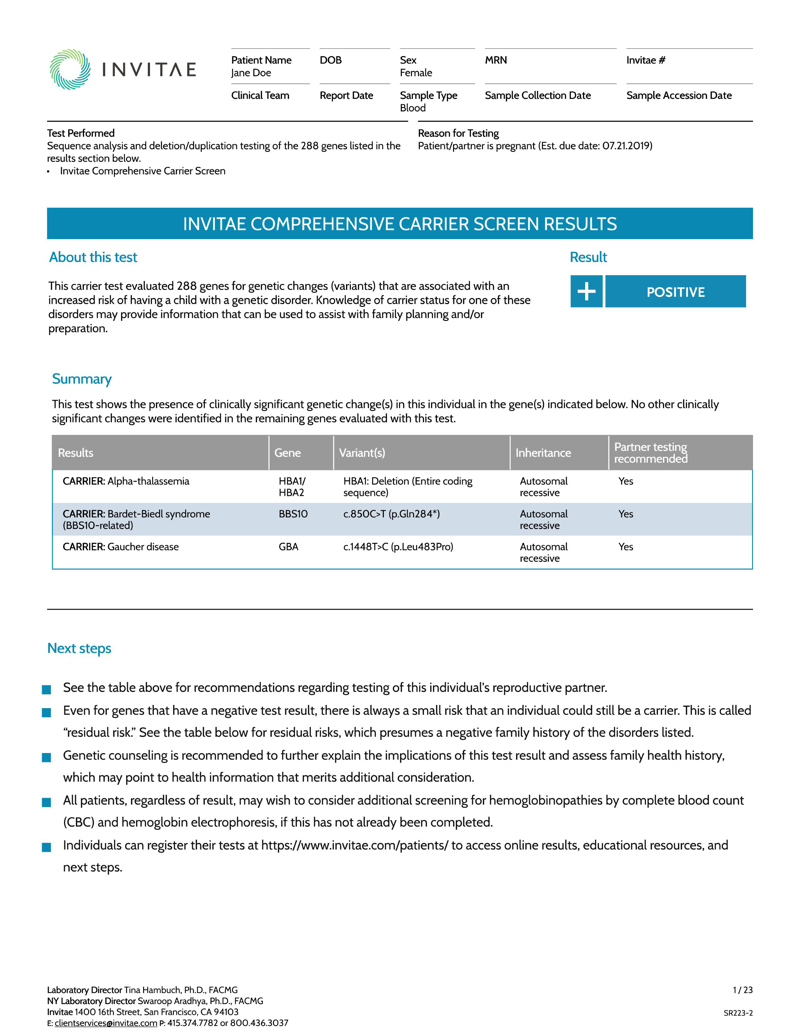


    Image #1:
    Origin: s3a://datasets/pdfs/reports/Positive-Report.pdf
    Resolution: 300 dpi
    Width: 7969 px
    Height: 10310 px


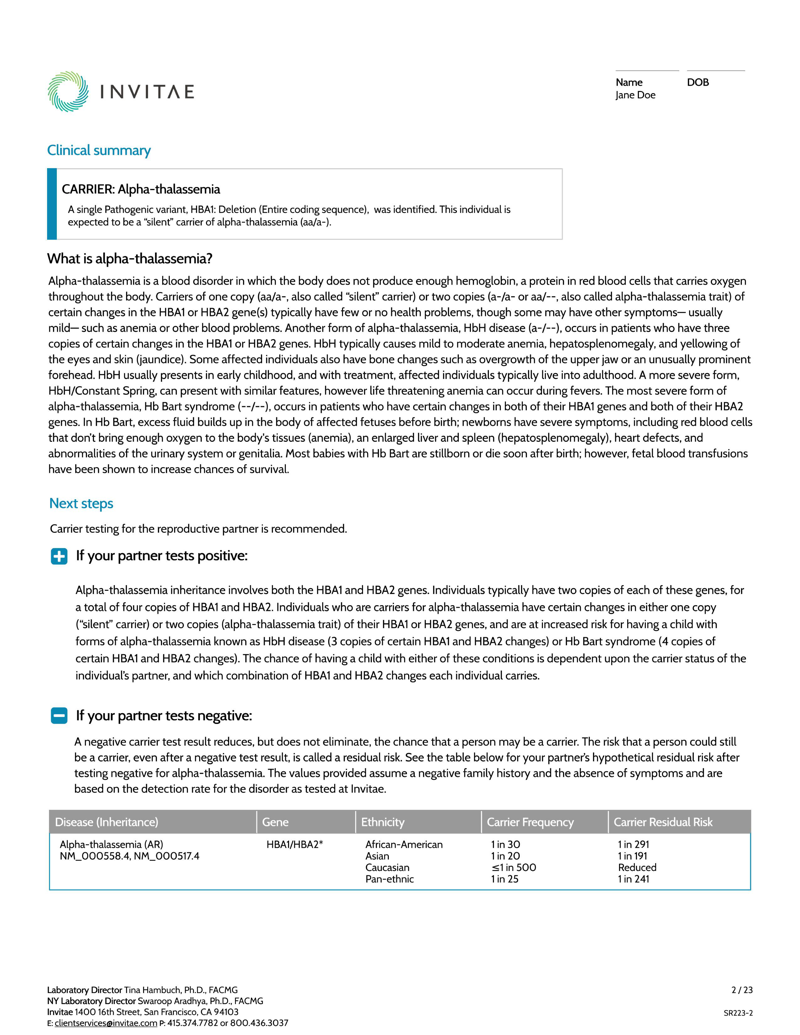

In [4]:
df = df.cache()
show_images(df, "image", limit=2, width=800)

### Extract text from the PDF

In [5]:
binary_to_image = BinaryToImage().setInputCol("image")
image_to_string = ImageToString()

text_df = image_to_string.transform(binary_to_image.transform(df)).cache()
text_df.toPandas()

License uid: a6e80c86-204a-11ef-976d-0242ac130004
License expiration date: 2025-06-02 01:59:59


Estimating resolution as 313                                      (0 + 12) / 12]
Estimating resolution as 275
Estimating resolution as 315
Estimating resolution as 312
Estimating resolution as 309
Estimating resolution as 315
Estimating resolution as 315
Estimating resolution as 314
Estimating resolution as 307                                      (1 + 11) / 12]
Estimating resolution as 323
Estimating resolution as 311
Estimating resolution as 312
Estimating resolution as 333
Estimating resolution as 314
Estimating resolution as 314
Estimating resolution as 313
Estimating resolution as 315
Estimating resolution as 312
Estimating resolution as 313
Estimating resolution as 316                                       (3 + 9) / 12]
Estimating resolution as 342==========>                            (6 + 6) / 12]
Estimating resolution as 313==============>                        (7 + 5) / 12]
Estimating resolution as 310========================>              (9 + 3) / 12]


,path,page_number,text
0,s3a://datasets/pdfs/reports/Positive-Report.pdf,0,(s3a://datasets/pdfs/reports/Positive-Report.p...
1,s3a://datasets/pdfs/reports/Positive-Report.pdf,1,(s3a://datasets/pdfs/reports/Positive-Report.p...
2,s3a://datasets/pdfs/reports/Positive-Report.pdf,2,(s3a://datasets/pdfs/reports/Positive-Report.p...
3,s3a://datasets/pdfs/reports/Positive-Report.pdf,3,(s3a://datasets/pdfs/reports/Positive-Report.p...
4,s3a://datasets/pdfs/reports/Positive-Report.pdf,4,(s3a://datasets/pdfs/reports/Positive-Report.p...
5,s3a://datasets/pdfs/reports/Positive-Report.pdf,5,(s3a://datasets/pdfs/reports/Positive-Report.p...
6,s3a://datasets/pdfs/reports/Positive-Report.pdf,6,(s3a://datasets/pdfs/reports/Positive-Report.p...
7,s3a://datasets/pdfs/reports/Positive-Report.pdf,7,(s3a://datasets/pdfs/reports/Positive-Report.p...
8,s3a://datasets/pdfs/reports/Positive-Report.pdf,8,(s3a://datasets/pdfs/reports/Positive-Report.p...
9,s3a://datasets/pdfs/reports/Positive-Report.pdf,9,(s3a://datasets/pdfs/reports/Positive-Report.p...


### Show text from the first page

In [6]:
print(text_df.select("text.text").collect()[0][0])

e \ Patient Name DOB Sex MRN Invitae # ee y INVITAE Jane Doe Female (( ( \ WS “SS SS Clinical Team Report Date Sample Type Sample Collection Date Sample Accession Date Blood Test Performed Reason for Testing Sequence analysis and deletion/duplication testing of the 288 genes listed in the Patient/partner is pregnant (Est. due date: 07.21.2019) results section below. Invitae Comprehensive Carrier Screen About this test Result This carrier test evaluated 288 genes for genetic changes (variants) that are associated with an increased risk of having a child with a genetic disorder. Knowledge of carrier status for one of these disorders may provide information that can be used to assist with family planning and/or preparation. Summary This test shows the presence of clinically significant genetic change(s) in this individual in the gene(s) indicated below. No other clinically significant changes were identified in the remaining genes evaluated with this test. Partner testing Results Gene Var